In [7]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py, glob, os
import pandas as pd

from itertools import product
from ang_res_funcs import *

In [31]:
# Set which directory we're pulling from

DIRECT = '../data/arrays/'

# We will load all the .npy arrays below. Refer to the naming conventions to
# understand the np array names. 

# Choose the reconstruction used for each tier. For 2012 with 4 tiers, 
# ShowerPlane is used for Tier 1 and Laputop for Tiers 2, 3 and 4.
# For 2015, it would be ['lap', 'lap']
reco = ['sp', 'lap', 'lap', 'lap']


"""
Naming convention:

mc-  = Monte Carlo (Simulation)
lap- = Laputop (Reconstructed Simulation)
sp-  = ShowerPlane (Reconstructed Simulation)

-p-   = Proton
-he-  = Helium
-o-   = Oxygen
-fe-  = Iron
If particle is not specified, array is concatenated across all four
particle types.

-en-  = Energy
-zen- = Zenith
-az-  = Azimuth
-w-   = Weighting

-t1   = Tier 1, lowest energy bin
-t2   = Tier 2, second lowest energy bin
-t3   = Tier 3, second highest energy bin
-t4   = Tier 4, highest energy bin
-24   = Data from Tiers 2 through 4, concatenated

"""

'\nNaming convention:\n\nmc-  = Monte Carlo (Simulation)\nlap- = Laputop (Reconstructed Simulation)\nsp-  = ShowerPlane (Reconstructed Simulation)\n\n-p-   = Proton\n-he-  = Helium\n-o-   = Oxygen\n-fe-  = Iron\nIf particle is not specified, array is concatenated across all four\nparticle types.\n\n-en-  = Energy\n-zen- = Zenith\n-az-  = Azimuth\n-w-   = Weighting\n\n-t1   = Tier 1, lowest energy bin\n-t2   = Tier 2, second lowest energy bin\n-t3   = Tier 3, second highest energy bin\n-t4   = Tier 4, highest energy bin\n-24   = Data from Tiers 2 through 4, concatenated\n\n'

In [32]:
# Load .npy arrays generated in 001_nstation_binning.py 

name_mapping = {
    'Stations': 'ns',
    'Energy' : 'en',
    'Weights' : 'w',
    'Zenith' : 'zen',
    'Azimuth' : 'az',
    'Proton' : 'p',
    'Helium' : 'he',
    'Oxygen' : 'o',
    'Iron' : 'fe',
    'Laputop' : 'lap',
    'ShowerPlane' : 'sp',
    'MC' : 'mc',
    'T1' : 't1',
    'T2' : 't2',
    'T3' : 't3',
    'T4' : 't4'
}

for long_file_name in sorted(glob.glob(DIRECT+"/*")):
    file_name = long_file_name.split("/")[-1]
    parts = file_name.replace(".npy", "").split("-")
    # Map each part to its corresponding variable name component
    # Manually reorder and map parts to form the desired variable name
    reordered_parts = []
    if len(parts) == 4:
        reordered_parts.append(name_mapping.get(parts[2], parts[2].lower()))          # Always start with dataset/reco
    reordered_parts.extend([
        name_mapping.get(parts[-1], parts[-1].lower()),       # Next is 'param'
    name_mapping.get(parts[0], parts[0].lower()),  # e.g., 'Proton' -> 'p'
        name_mapping.get(parts[1], parts[1].lower()),  # e.g., 'T1' -> 't1'
    ])
    var_name = "_".join(reordered_parts)
    exec(f"{var_name} = np.load(os.path.join(DIRECT, '{file_name}'))")
    #print(f"Loaded {var_name} with shape {eval(var_name).shape}")

In [33]:
# Concatenate several of the above arrays to compare across tiers/particles/etc.
#NOTE - NEEDS TO BE EDITED FOR 2015/2018: NO t1 and NO t2, so files will not be found!!!

# Monte Carlo 
particles = ['p', 'he', 'o', 'fe']
tiers = ['t1', 't2', 't3', 't4']
parameters = ['zen', 'az', 'w']
recos = ['mc', 'lap', 'sp']

for reco, param, tier in product(recos, parameters, tiers):
    concat_list = []
    for p in particles:
        concat_list.append(eval("_".join([reco, param, p, tier])))
    var_name = "_".join([reco, param, tier])
    exec(f"{var_name} = np.concatenate(concat_list, axis=None)")

    if reco == "mc":
        concat_list = []
        for p in particles:
            concat_list.append(eval("_".join([reco, 'en', p, tier])))
        var_name = "_".join([reco, 'en', tier])
        exec(f"{var_name} = np.concatenate(concat_list, axis=None)")

#NStations?

In [34]:
# Confirm all are the same length
print(len(mc_zen_t4))
print(len(lap_zen_t4))
print(len(sp_zen_t4))

364318
364318
364318


In [15]:
# Plots and Tables

In [16]:
# Event Count Table

tiers = ["Tier 1", "Tier 2", "Tier 3", "Tier 4", "Sum"]
particles = ["Proton", "Helium", "Oxygen", "Iron", "Sum"]
ar = [[mc_zen_p_t1, mc_zen_he_t1, mc_zen_o_t1, mc_zen_fe_t1, mc_zen_t1], 
          [mc_zen_p_t2, mc_zen_he_t2, mc_zen_o_t2, mc_zen_fe_t2, mc_zen_t2], 
          [mc_zen_p_t3, mc_zen_he_t3, mc_zen_o_t3, mc_zen_fe_t3, mc_zen_t3], 
          [mc_zen_p_t4, mc_zen_he_t4, mc_zen_o_t4, mc_zen_fe_t4, mc_zen_t4]]


counts = []
for row in ar:
    c_row = []
    for a in row:
        c_row.append(len(a[a < 55]))
    counts.append(c_row)


# Calculate sums
sum_p = 0
sum_he = 0
sum_o = 0
sum_fe = 0
sum_sum = 0
for arr in counts:
    sum_p += arr[0]
    sum_he += arr[1]
    sum_o += arr[2]
    sum_fe += arr[3]
    sum_sum += arr[4]
    
counts.append([sum_p, sum_he, sum_o, sum_fe, sum_sum])

dic = dict(zip(tiers, counts))
df = pd.DataFrame.from_dict(dic, orient='index', columns = particles)

display(df)

,Proton,Helium,Oxygen,Iron,Sum
Tier 1,29989,29350,28402,27610,115351
Tier 2,108694,103620,96799,88805,397918
Tier 3,82168,79034,76593,71448,309243
Tier 4,87615,86665,86190,84644,345114
Sum,308466,298669,287984,272507,1167626


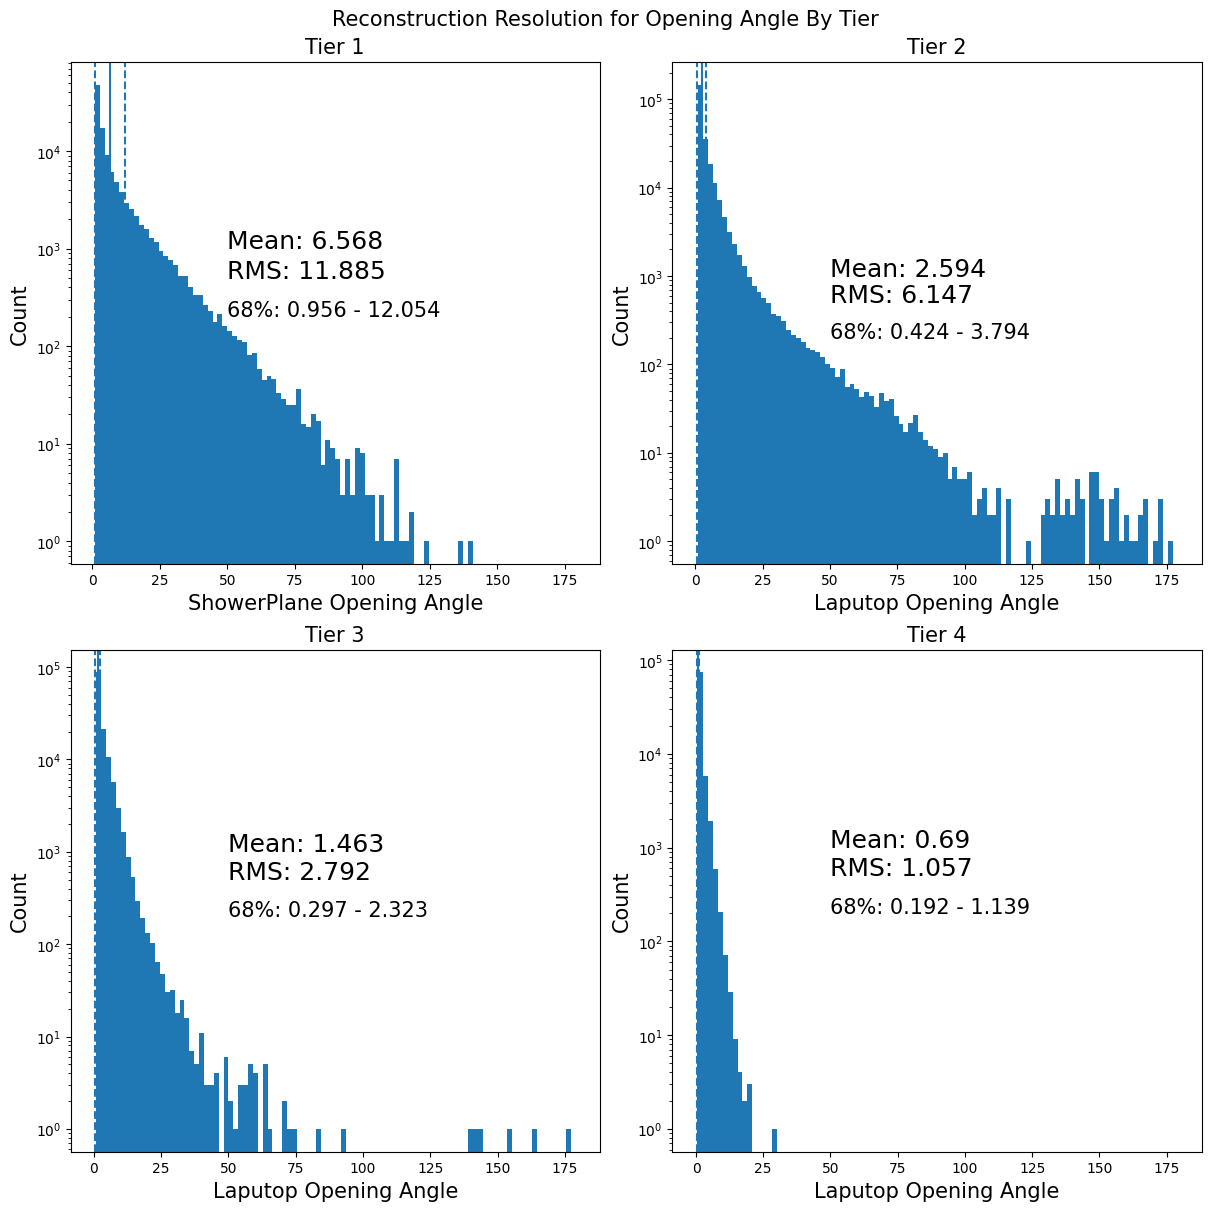

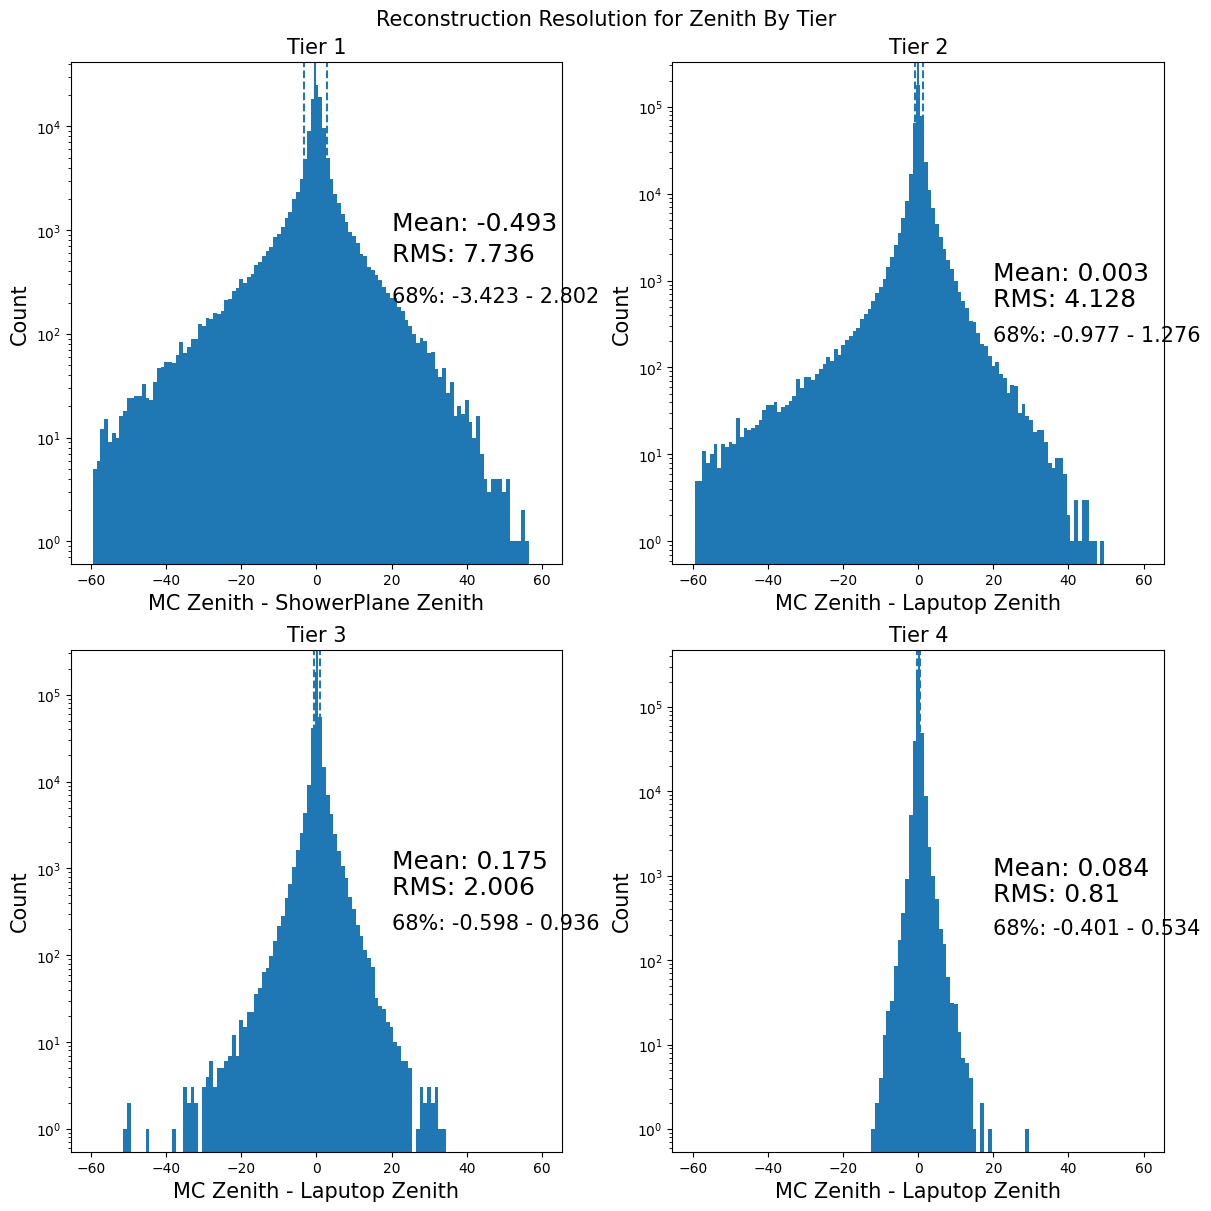

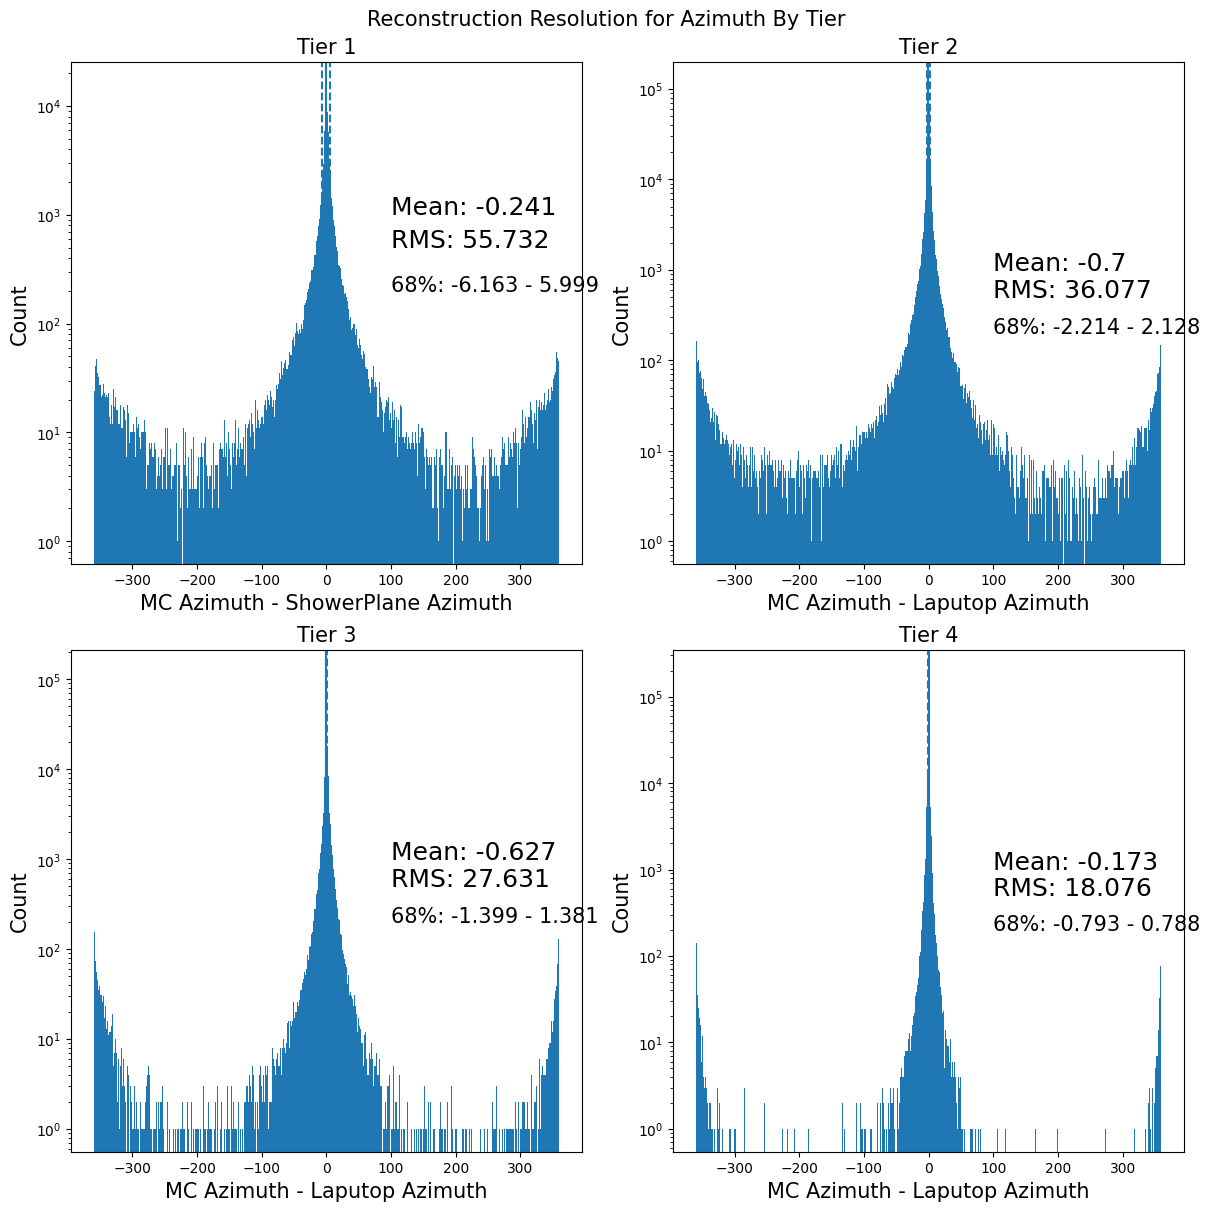

In [17]:
# Titles of figures
reco_name = ['ShowerPlane', 'Laputop', 'Laputop', 'Laputop']
tiers = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4']

# Concatenate arrays
mc_zen = [mc_zen_t1, mc_zen_t2, mc_zen_t3, mc_zen_t4]
reco_zen = [sp_zen_t1, lap_zen_t2, lap_zen_t3, lap_zen_t4]

mc_az = [mc_az_t1, mc_az_t2, mc_az_t3, mc_az_t4]
reco_az = [sp_az_t1, lap_az_t2, lap_az_t3, lap_az_t4]

# Call functions to plot
reco_open_ang_res_bytier(mc_zen, reco_zen, mc_az, reco_az, reco_name, tiers)
reco_zen_res_bytier(mc_zen, reco_zen, reco_name, tiers)
reco_az_res_bytier(mc_az, reco_az, reco_name, tiers)

62.859
62.859
65
65
65
65
65
65


/home/ebastow/11-year-Update-Paper-Figures/Figure3/ang_res_funcs.py:432: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_array[x_ind, y_ind].set_yticklabels(np.round(locs/len(proton_slice1), 2))
/home/ebastow/11-year-Update-Paper-Figures/Figure3/ang_res_funcs.py:432: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_array[x_ind, y_ind].set_yticklabels(np.round(locs/len(proton_slice1), 2))
/home/ebastow/11-year-Update-Paper-Figures/Figure3/ang_res_funcs.py:432: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_array[x_ind, y_ind].set_yticklabels(np.round(locs/len(proton_slice1), 2))
/home/ebastow/11-year-Update-Paper-Figures/Figure3/ang_res_funcs.py:432: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. af

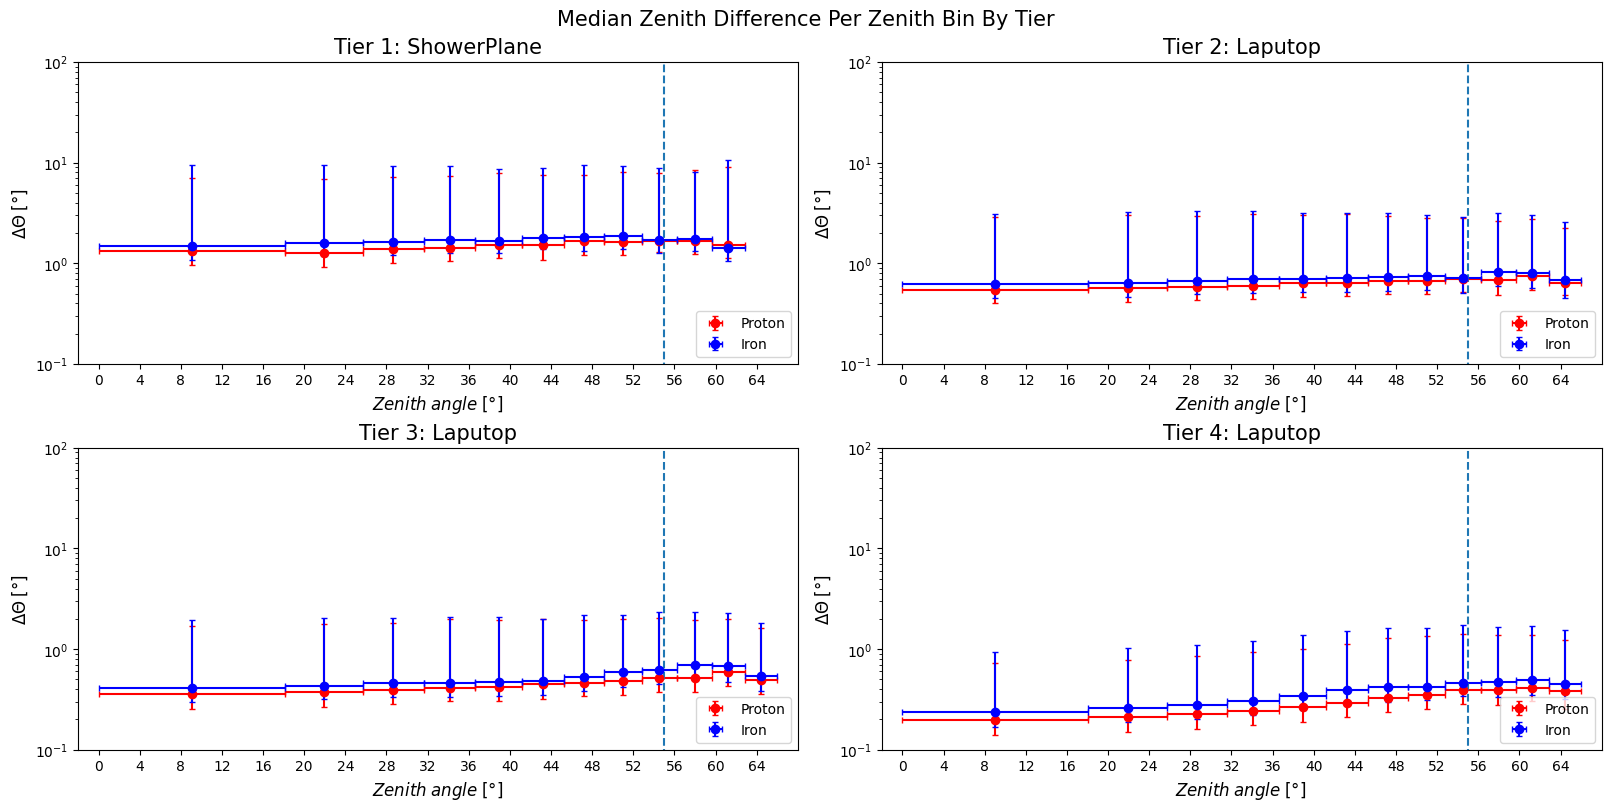

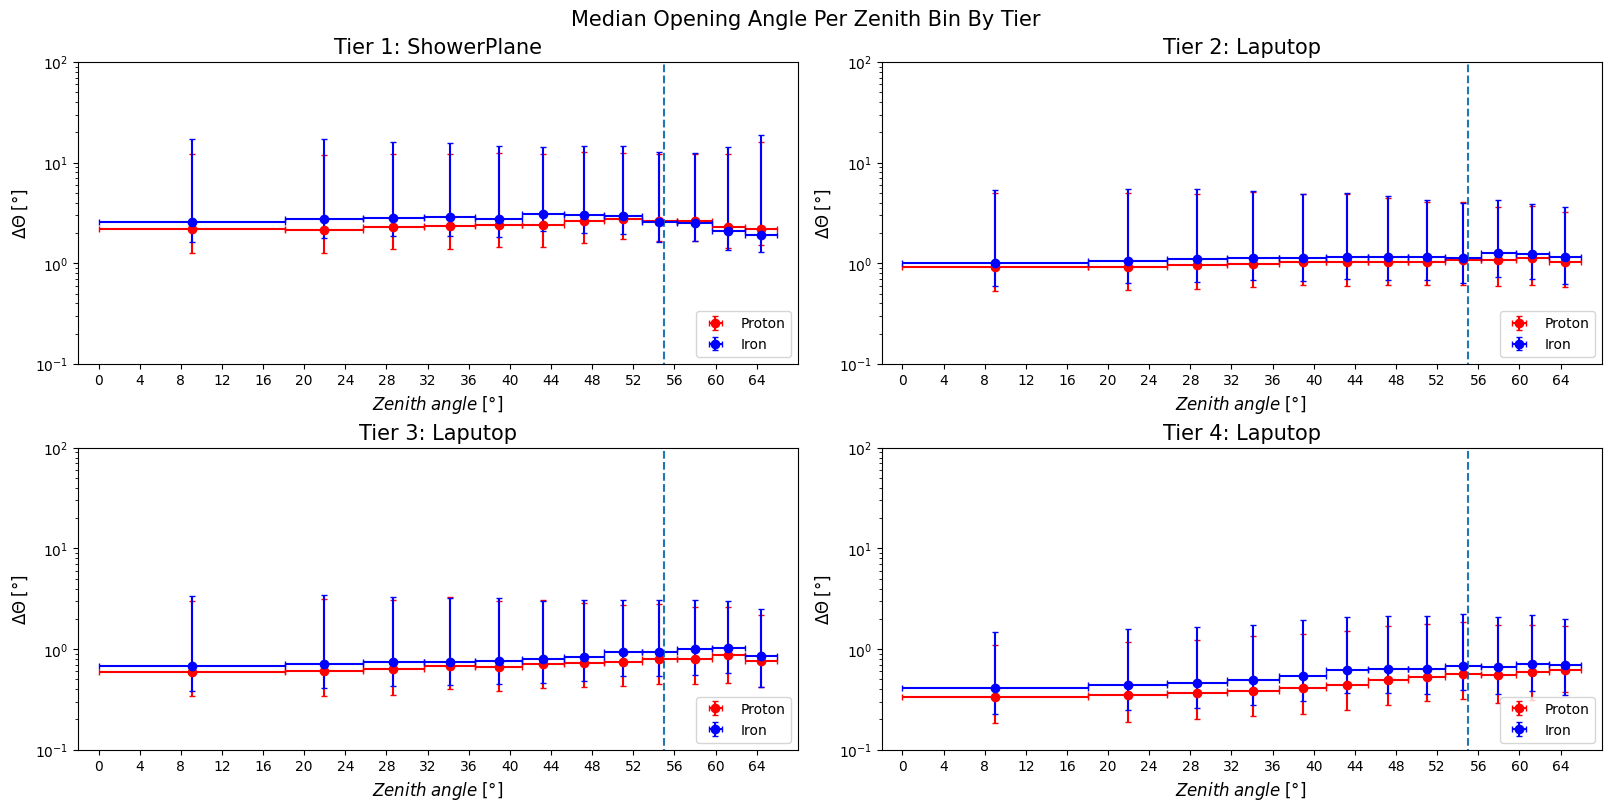

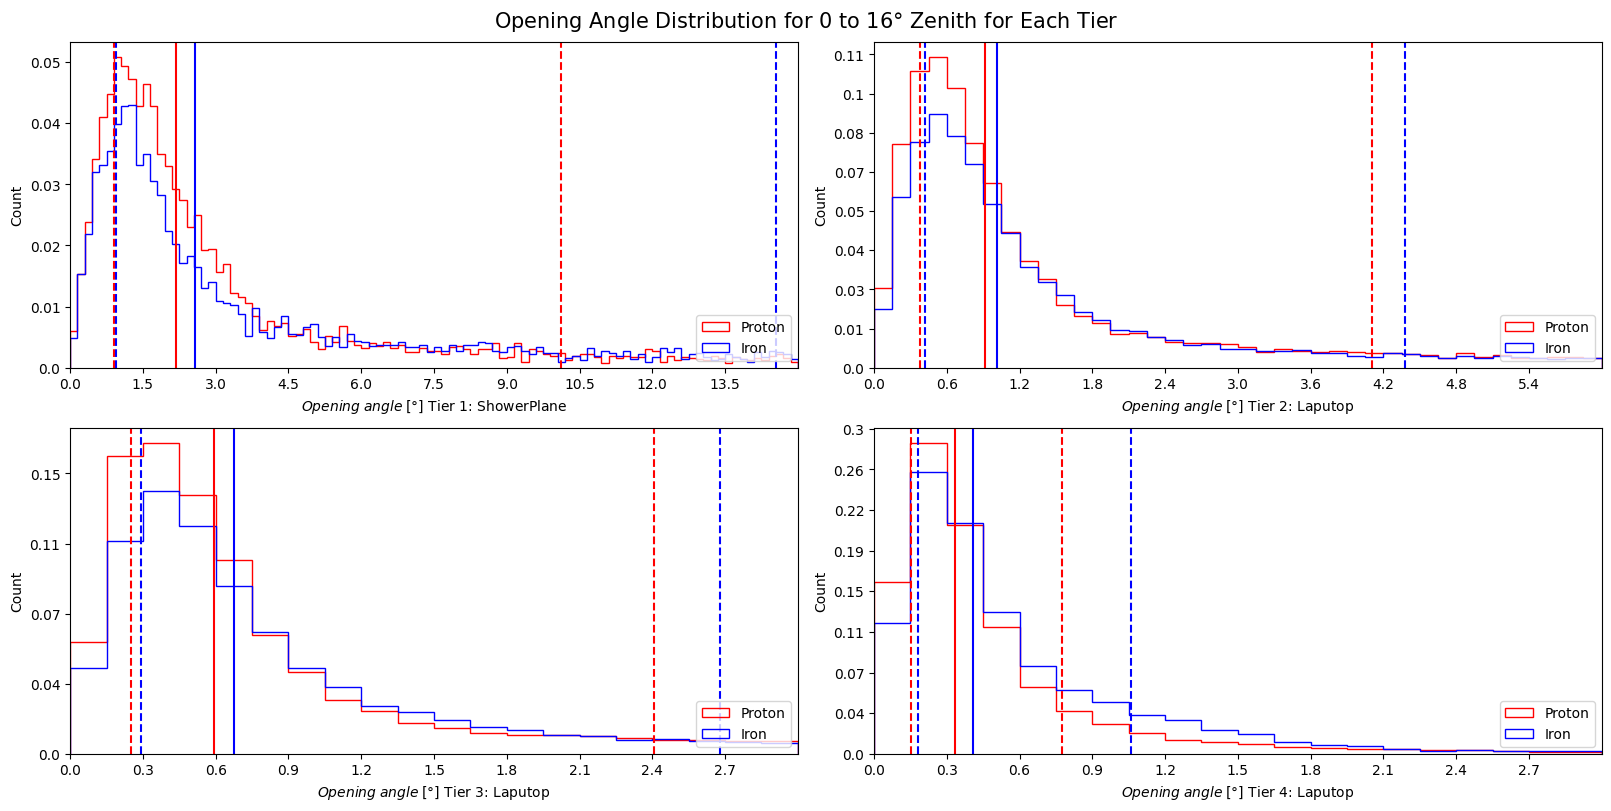

In [25]:
# Titles of subplots
titles = ['Tier 1: ShowerPlane', 'Tier 2: Laputop', 'Tier 3: Laputop', 'Tier 4: Laputop']

# No events in final bin for tier 1 for zenith diff, but want same bin centres and widths
reg_cos_binends = get_cosine_binning(66, 12)
t1_cos_binends = get_cosine_binning(62.859, 11)

bin_ends_zd = [t1_cos_binends, reg_cos_binends, reg_cos_binends, reg_cos_binends]
cuts_zd = [62.859, 65, 65, 65]

# Same binnning for opening angle
bin_ends = [reg_cos_binends, reg_cos_binends, reg_cos_binends, reg_cos_binends]
cuts = [65, 65, 65, 65]

# Concatenate arrays
mc_zen_p = [mc_zen_p_t1, mc_zen_p_t2, mc_zen_p_t3, mc_zen_p_t4]
reco_zen_p = [sp_zen_p_t1, lap_zen_p_t2, lap_zen_p_t3, lap_zen_p_t4]

mc_zen_fe = [mc_zen_fe_t1, mc_zen_fe_t2, mc_zen_fe_t3, mc_zen_fe_t4]
reco_zen_fe = [sp_zen_fe_t1, lap_zen_fe_t2, lap_zen_fe_t3, lap_zen_fe_t4]

mc_az_p = [mc_az_p_t1, mc_az_p_t2, mc_az_p_t3, mc_az_p_t4]
reco_az_p = [sp_az_p_t1, lap_az_p_t2, lap_az_p_t3, lap_az_p_t4]

mc_az_fe = [mc_az_fe_t1, mc_az_fe_t2, mc_az_fe_t3, mc_az_fe_t4]
reco_az_fe = [sp_az_fe_t1, lap_az_fe_t2, lap_az_fe_t3, lap_az_fe_t4]


# Call functions
zenith_diff_p_fe_by_tier(mc_zen_p, reco_zen_p, mc_zen_fe, reco_zen_fe,
                             bin_ends_zd, titles, cuts_zd)

open_angle_p_fe_by_tier(mc_zen_p, reco_zen_p, mc_az_p, reco_az_p, mc_zen_fe,
                            reco_zen_fe, mc_az_fe, reco_az_fe, bin_ends, titles,
                            cuts)
open_angle_p_fe_first_slice(mc_zen_p, reco_zen_p, mc_az_p, reco_az_p, mc_zen_fe,
                            reco_zen_fe, mc_az_fe, reco_az_fe, bin_ends_zd, titles,
                            cuts_zd)

In [26]:
"""
Let's separate the events into their bins so we can calculate the errorbars.
For Burnsample data, we will use this only for the number of events in each bin.
For Laputop, we need to use a "distance formula" on the weights in each bin 
i.e (sqrt(sum of the squares of the weight for each event in the bin))
""" 
mczenbins_t1 = []
lapzenbins_t1 = []
spzenbins_t1 = []

mczenwbins_t1 = []
lapzenwbins_t1 = []
spzenwbins_t1 = []

mcazbins_t1 = []
lapazbins_t1 = []
spazbins_t1 = []

mcazwbins_t1 = []
lapazwbins_t1 = []
spazwbins_t1 = []




mczenbins_t2 = []
lapzenbins_t2 = []
spzenbins_t2 = []

mczenwbins_t2 = []
lapzenwbins_t2 = []
spzenwbins_t2 = []

mcazbins_t2 = []
lapazbins_t2 = []
spazbins_t2 = []

mcazwbins_t2 = []
lapazwbins_t2 = []
spazwbins_t2 = []



mczenbins_t3 = []
lapzenbins_t3 = []
spzenbins_t3 = []

mczenwbins_t3 = []
lapzenwbins_t3 = []
spzenwbins_t3 = []

mcazbins_t3 = []
lapazbins_t3 = []
spazbins_t3 = []

mcazwbins_t3 = []
lapazwbins_t3 = []
spazwbins_t3 = []




mczenbins_t4 = []
lapzenbins_t4 = []
spzenbins_t4 = []

mczenwbins_t4 = []
lapzenwbins_t4 = []
spzenwbins_t4 = []

mcazbins_t4 = []
lapazbins_t4 = []
spazbins_t4 = []

mcazwbins_t4 = []
lapazwbins_t4 = []
spazwbins_t4 = []


proton_median_energy_t1 = []
proton_median_energy_t4 = []
iron_median_energy_t1 = []
iron_median_energy_t4 = []

proton_median_energy_t2 = []
proton_median_energy_t3 = []
iron_median_energy_t2 = []
iron_median_energy_t3 = []

p_t1_err = []
p_t2_err = []
fe_t1_err = []
fe_t2_err = []

p_t3_err = []
p_t4_err = []
fe_t3_err = []
fe_t4_err = []

# Set bins for zenith (0-66 in steps of 3)
zenbins_t1 = t1_cos_binends
zenbins = reg_cos_binends
# Set bins for azimuth (0-360 in steps of 5)
azbins = np.arange(0,361, 5)

"""
np.digitize(a, bins) gives the bin number (index+1) that each entry in a should go into
So by subtracting 1, we can get the index, and create a 2D array with len(zenbins) rows and 
N_i events in each row (columns)

e.g. mczenbins[0] will have all the MCPrimary zenith readings between 0-3 degrees
and brnazbins[3] will have all the BurnSample azimuth readings between 9-12 degrees
"""
# First, get the indexies of where all zenith events should go using digitize
mcindex_t1 = np.digitize(mc_zen_t1, zenbins_t1, right=False) - 1
spindex_t1 = np.digitize(sp_zen_t1, zenbins_t1, right=False) - 1

mcindex_t2 = np.digitize(mc_zen_t2, zenbins, right=False) - 1
lapindex_t2 = np.digitize(lap_zen_t2, zenbins, right=False) - 1

mcindex_t3 = np.digitize(mc_zen_t3, zenbins, right=False) - 1
lapindex_t3 = np.digitize(lap_zen_t3, zenbins, right=False) - 1

mcindex_t4 = np.digitize(mc_zen_t4, zenbins, right=False) - 1
lapindex_t4 = np.digitize(lap_zen_t4, zenbins, right=False) - 1

p_t1_index = np.digitize(mc_zen_p_t1, zenbins_t1, right=False)-1
p_t2_index = np.digitize(mc_zen_p_t2, zenbins, right=False)-1
p_t3_index = np.digitize(mc_zen_p_t3, zenbins, right=False)-1
p_t4_index = np.digitize(mc_zen_p_t4, zenbins, right=False)-1

fe_t1_index = np.digitize(mc_zen_fe_t1, zenbins_t1, right=False)-1
fe_t2_index = np.digitize(mc_zen_fe_t2, zenbins, right=False)-1
fe_t3_index = np.digitize(mc_zen_fe_t3, zenbins, right=False)-1
fe_t4_index = np.digitize(mc_zen_fe_t4, zenbins, right=False)-1



# Then use the indicies to sort the data 
for b in range(len(zenbins_t1) - 1):
    
    mczenbins_t1.append(mc_zen_t1[mcindex_t1==b])
    mczenwbins_t1.append(mc_w_t1[mcindex_t1==b])
    spzenbins_t1.append(sp_zen_t1[spindex_t1==b])
    spzenwbins_t1.append(sp_w_t1[spindex_t1==b])
    
    
    m, u, l = weighted_quantile(mc_en_p_t1[p_t1_index==b]*(10**-6), [.5, .84, .16], sample_weight=mc_w_p_t1[p_t1_index==b])
    proton_median_energy_t1.append(m)
    p_t1_err.append([m-l, u-m])
    
    
    
    
    m, u, l = weighted_quantile(mc_en_fe_t1[fe_t1_index==b]*(10**-6), [.5, .84, .16], sample_weight=mc_w_fe_t1[fe_t1_index==b])
    iron_median_energy_t1.append(m)
    fe_t1_err.append([m-l, u-m])
    
for b in range(len(zenbins)-1): 
    
    mczenbins_t2.append(mc_zen_t2[mcindex_t2==b])
    mczenwbins_t2.append(mc_w_t2[mcindex_t2==b])
    lapzenbins_t2.append(lap_zen_t2[lapindex_t2==b])
    lapzenwbins_t2.append(lap_w_t2[lapindex_t2==b])
    
    
    mczenbins_t3.append(mc_zen_t3[mcindex_t3==b])
    mczenwbins_t3.append(mc_w_t3[mcindex_t3==b])
    lapzenbins_t3.append(lap_zen_t3[lapindex_t3==b])
    lapzenwbins_t3.append(lap_w_t3[lapindex_t3==b])
    
    
    mczenbins_t4.append(mc_zen_t4[mcindex_t4==b])
    mczenwbins_t4.append(mc_w_t4[mcindex_t4==b])
    lapzenbins_t4.append(lap_zen_t4[lapindex_t4==b])
    lapzenwbins_t4.append(lap_w_t4[lapindex_t4==b])
    
    """
    We also use the weighted quantile function here to find the median(m) as well as the upper and lower
    error bar bounds using the 84% (u) and 16% (l) quantile. So m-l will be the downward error bar length
    and u-m will be the upward error bar length. These are stored as an array in order to make plotting easier. 
    """
    m, u, l = weighted_quantile(mc_en_p_t2[p_t2_index==b]*(10**-6), [.5, .84, .16], sample_weight=mc_w_p_t2[p_t2_index==b])
    proton_median_energy_t2.append(m)
    p_t2_err.append([m-l, u-m])
    
    m, u, l = weighted_quantile(mc_en_p_t3[p_t3_index==b]*(10**-6), [.5, .84, .16], sample_weight=mc_w_p_t3[p_t3_index==b])
    proton_median_energy_t3.append(m)
    p_t3_err.append([m-l, u-m])
    
    m, u, l = weighted_quantile(mc_en_p_t4[p_t4_index==b]*(10**-6), [.5, .84, .16], sample_weight=mc_w_p_t4[p_t4_index==b])
    proton_median_energy_t4.append(m)
    p_t4_err.append([m-l, u-m])
    
    

    
    m, u, l = weighted_quantile(mc_en_fe_t2[fe_t2_index==b]*(10**-6), [.5, .84, .16], sample_weight=mc_w_fe_t2[fe_t2_index==b])
    iron_median_energy_t2.append(m)
    fe_t2_err.append([m-l, u-m])
    
    m, u, l = weighted_quantile(mc_en_fe_t3[fe_t3_index==b]*(10**-6), [.5, .84, .16], sample_weight=mc_w_fe_t3[fe_t3_index==b])
    iron_median_energy_t3.append(m)
    fe_t3_err.append([m-l, u-m])
    
    m, u, l = weighted_quantile(mc_en_fe_t4[fe_t4_index==b]*(10**-6), [.5, .84, .16], sample_weight=mc_w_fe_t4[fe_t4_index==b])
    iron_median_energy_t4.append(m)
    fe_t4_err.append([m-l, u-m])
    
    
    
# Repeat the same process for azimuth
# Check to make sure binned arrays are all the same length
print(len(mczenbins_t1), len(spzenbins_t1))
print(len(mczenbins_t2), len(lapzenbins_t2))
print(len(mczenbins_t3), len(lapzenbins_t3))
print(len(mczenbins_t4), len(lapzenbins_t4))
print(len(proton_median_energy_t1), len(proton_median_energy_t4), len(iron_median_energy_t1), len(iron_median_energy_t4))


    
mczener_t1 = []
mcazer_t1 = []
spzener_t1 = []
spazer_t1 = []

mczener_t2 = []
mcazer_t2 = []
lapzener_t2 = []
lapazer_t2 = []

mczener_t3 = []
mcazer_t3 = []
lapzener_t3 = []
lapazer_t3 = []

mczener_t4 = []
mcazer_t4 = []
lapzener_t4 = []
lapazer_t4 = []

# For the MCPrimary and Laputop errors, we need to take the square root of the 
# sum of the squares of the weights in each bin
for b in mczenwbins_t1:
    mczener_t1.append(math.sqrt(np.sum(b*b)))
for b in spzenwbins_t1:
    spzener_t1.append(math.sqrt(np.sum(b*b)))
    
for b in mczenwbins_t2:
    mczener_t2.append(math.sqrt(np.sum(b*b)))
for b in lapzenwbins_t2:
    lapzener_t2.append(math.sqrt(np.sum(b*b)))
    
for b in mczenwbins_t3:
    mczener_t3.append(math.sqrt(np.sum(b*b)))
for b in lapzenwbins_t3:
    lapzener_t3.append(math.sqrt(np.sum(b*b)))
    
for b in mczenwbins_t4:
    mczener_t4.append(math.sqrt(np.sum(b*b)))
for b in lapzenwbins_t4:
    lapzener_t4.append(math.sqrt(np.sum(b*b)))
print(len(mczener_t2),len(lapzener_t2))

11 11
12 12
12 12
12 12
11 12 11 12
12 12


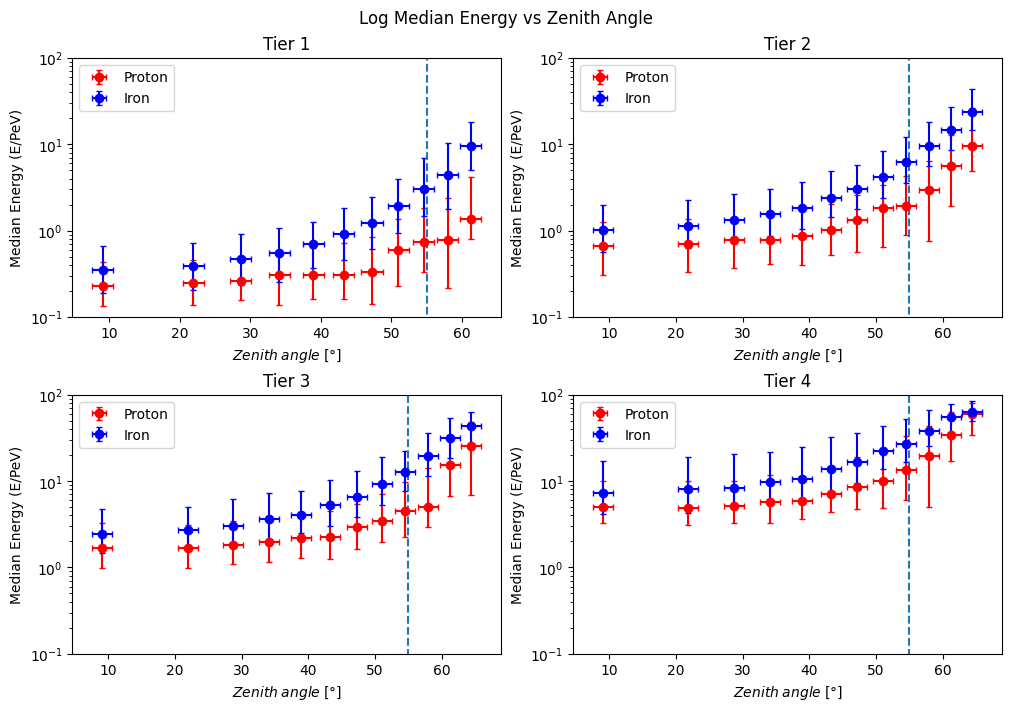

In [30]:
#ALSO GET THIS PLOT 9/16

fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax_array = fig.subplots(2, 2, squeeze=False)
fig.suptitle('Log Median Energy vs Zenith Angle')

arccos_zenbin_ends_t1 = t1_cos_binends
arccos_zenbin_ends = reg_cos_binends
zenbincenters_t1 = (arccos_zenbin_ends_t1[1:] + arccos_zenbin_ends_t1[:-1])/2
zenbincenters = (arccos_zenbin_ends[1:] + arccos_zenbin_ends[:-1])/2


ql, qh = [i[0] for i in p_t1_err], [i[1] for i in p_t1_err]
ax_array[0,0].errorbar(zenbincenters_t1, proton_median_energy_t1, xerr=1.5, yerr=[ql, qh], capsize=2, fmt='o', color='red', label='Proton')

ql, qh = [i[0] for i in fe_t1_err], [i[1] for i in fe_t1_err]
ax_array[0,0].errorbar(zenbincenters_t1, iron_median_energy_t1, xerr=1.5, yerr=[ql, qh], capsize=2, fmt='o', color='blue', label='Iron')
ax_array[0,0].set_title('Tier 1')

ax_array[0,0].set_yscale('log')
ax_array[0,0].vlines(55, 0, 2000, linestyle = 'dashed')
ax_array[0,0].set_ylim(.1,100)
ax_array[0,0].set_ylabel('Median Energy (E/PeV)')
ax_array[0,0].set_xlabel(r'$Zenith\;angle\;[\degree]$')
ax_array[0,0].legend(loc='upper left')


ql, qh = [i[0] for i in p_t2_err], [i[1] for i in p_t2_err]
ax_array[0,1].errorbar(zenbincenters, proton_median_energy_t2, xerr=1.5, yerr=[ql, qh], capsize=2, fmt='o', color='red', label='Proton')

ql, qh = [i[0] for i in fe_t2_err], [i[1] for i in fe_t2_err]
ax_array[0,1].errorbar(zenbincenters, iron_median_energy_t2, xerr=1.5, yerr=[ql, qh], capsize=2, fmt='o', color='blue', label='Iron')
ax_array[0,1].set_title('Tier 2')

ax_array[0,1].set_yscale('log')
ax_array[0,1].vlines(55, 0, 2000, linestyle = 'dashed')
ax_array[0,1].set_ylim(.1,100)
ax_array[0,1].set_ylabel('Median Energy (E/PeV)')
ax_array[0,1].set_xlabel(r'$Zenith\;angle\;[\degree]$')
ax_array[0,1].legend(loc='upper left')

ql, qh = [i[0] for i in p_t3_err], [i[1] for i in p_t3_err]
ax_array[1,0].errorbar(zenbincenters, proton_median_energy_t3, xerr=1.5, yerr=[ql, qh], capsize=2, fmt='o', color='red', label='Proton')
ql, qh = [i[0] for i in fe_t3_err], [i[1] for i in fe_t3_err]
ax_array[1,0].errorbar(zenbincenters, iron_median_energy_t3, xerr=1.5, yerr=[ql, qh], capsize=2, fmt='o', color='blue', label='Iron')
ax_array[1,0].set_title('Tier 3')

ax_array[1,0].set_yscale('log')
ax_array[1,0].vlines(55, 0, 2000, linestyle = 'dashed')
ax_array[1,0].set_ylim(.1,100)
ax_array[1,0].set_ylabel('Median Energy (E/PeV)')
ax_array[1,0].set_xlabel(r'$Zenith\;angle\;[\degree]$')
ax_array[1,0].legend(loc='upper left')

ql, qh = [i[0] for i in p_t4_err], [i[1] for i in p_t4_err]
ax_array[1,1].errorbar(zenbincenters, proton_median_energy_t4, xerr=1.5, yerr=[ql, qh], capsize=2, fmt='o', color='red', label='Proton')

ql, qh = [i[0] for i in fe_t4_err], [i[1] for i in fe_t4_err]
ax_array[1,1].errorbar(zenbincenters, iron_median_energy_t4, xerr=1.5, yerr=[ql, qh], capsize=2, fmt='o', color='blue', label='Iron')
ax_array[1,1].set_title('Tier 4')

ax_array[1,1].set_yscale('log')

ax_array[1,1].vlines(55, 0, 2000, linestyle = 'dashed')
ax_array[1,1].set_ylim(.1,100)
ax_array[1,1].set_ylabel('Median Energy (E/PeV)')
ax_array[1,1].set_xlabel(r'$Zenith\;angle\;[\degree]$')
ax_array[1,1].legend(loc='upper left')


In [28]:
def getMedian(data):
    dat = data[0]*(10**-6)
    wei = data[1]
    median = weighted_quantile(dat, .5, sample_weight=wei/sum(wei))
    std = [weighted_quantile(dat, .5-.34, sample_weight=wei/sum(wei)), 
                                                weighted_quantile(dat, .5+.34, sample_weight=wei/sum(wei))]
    return [median, std]

dat = []
dat.append(["3 $\leq$ s $<$ 5", " ", "5 $\leq$ s $<$ 9", " ", 
            "9 $\leq$ s $<$ 16", " ", "s $\geq$ 16", " "])
row = []
for arra in [[mc_en_p_t1, mc_w_p_t1], [mc_en_p_t2, mc_w_p_t2], [mc_en_p_t3, mc_w_p_t3], [mc_en_p_t4, mc_w_p_t4]]:
    median, std = getMedian(arra)
    median = '{:.2f} PeV'.format(median)
    ran = '{:.2f} - {:.2f} PeV'.format(std[0], std[1])

    row.extend([median, ran])
    
dat.append(row)

row = []
for arra in [[mc_en_fe_t1, mc_w_fe_t1], [mc_en_fe_t2, mc_w_fe_t2], [mc_en_fe_t3, mc_w_fe_t3], [mc_en_fe_t4, mc_w_fe_t4]]:
    median, std = getMedian(arra)
    median = '{:.2f} PeV'.format(median)
    ran = '{:.2f} - {:.2f} PeV'.format(std[0], std[1])

    row.extend([median, ran])
dat.append(row)

row = []
for arra in [[mc_en_t1, mc_w_t1], [mc_en_t2, mc_w_t2], [mc_en_t3, mc_w_t3], [mc_en_t4, mc_w_t4]]:
    median, std = getMedian(arra)
    median = '{:.2f} PeV'.format(median)
    ran = '{:.2f} - {:.2f} PeV'.format(std[0], std[1])

    row.extend([median, ran])
    
dat.append(row)
df = pd.DataFrame(dat, index=pd.Index([' ', 'Proton', 'Iron', 'All Particles']), 
                      columns=pd.MultiIndex.from_product([['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'],['Median', '68% Interval']]))
display(df)
#df.to_pickle('/home/gagrawal/jsummers/output/energytable2012.pkl')

<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\g'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_3168/1169394421.py:10: SyntaxWarning: invalid escape sequence '\l'
  dat.append(["3 $\leq$ s $<$ 5", " ", "5 $\leq$ s $<$ 9", " ",
/tmp/ipykernel_3168/1169394421.py:10: SyntaxWarning: invalid escape sequence '\l'
  dat.append(["3 $\leq$ s $<$ 5", " ", "5 $\leq$ s $<$ 9", " ",
/tmp/ipykernel_3168/1169394421.py:11: SyntaxWarning: invalid escape sequence '\l'
  "9 $\leq$ s $<$ 16", " ", "s $\geq$ 16", " "])
/tmp/ipykernel_3168/1169394421.py:11: SyntaxWarning: invalid escape sequence '\g'
  "9 $\leq$ s $<$ 16", " ", "s $\geq$ 16", " "])


Tier 1                             Tier 2  \
                         Median     68% Interval            Median   
               3 $\leq$ s $<$ 5                   5 $\leq$ s $<$ 9   
Proton                 0.26 PeV  0.14 - 0.53 PeV          0.77 PeV   
Iron                   0.46 PeV  0.23 - 0.98 PeV          1.36 PeV   
All Particles          0.30 PeV  0.15 - 0.63 PeV          0.92 PeV   

                                           Tier 3                   \
                  68% Interval             Median     68% Interval   
                                9 $\leq$ s $<$ 16                    
Proton         0.37 - 1.55 PeV           1.93 PeV  1.10 - 3.70 PeV   
Iron           0.70 - 2.98 PeV           3.20 PeV  1.78 - 7.19 PeV   
All Particles  0.44 - 1.95 PeV           2.36 PeV  1.29 - 4.75 PeV   

                    Tier 4                    
                    Median      68% Interval  
               s $\geq$ 16                    
Proton            5.66 PeV  3.41 - 12.06 PeV  
Iron              9.36 PeV  4.89 - 23.90 PeV  
All Particles     6.89 PeV  3.92 - 16.00 PeV

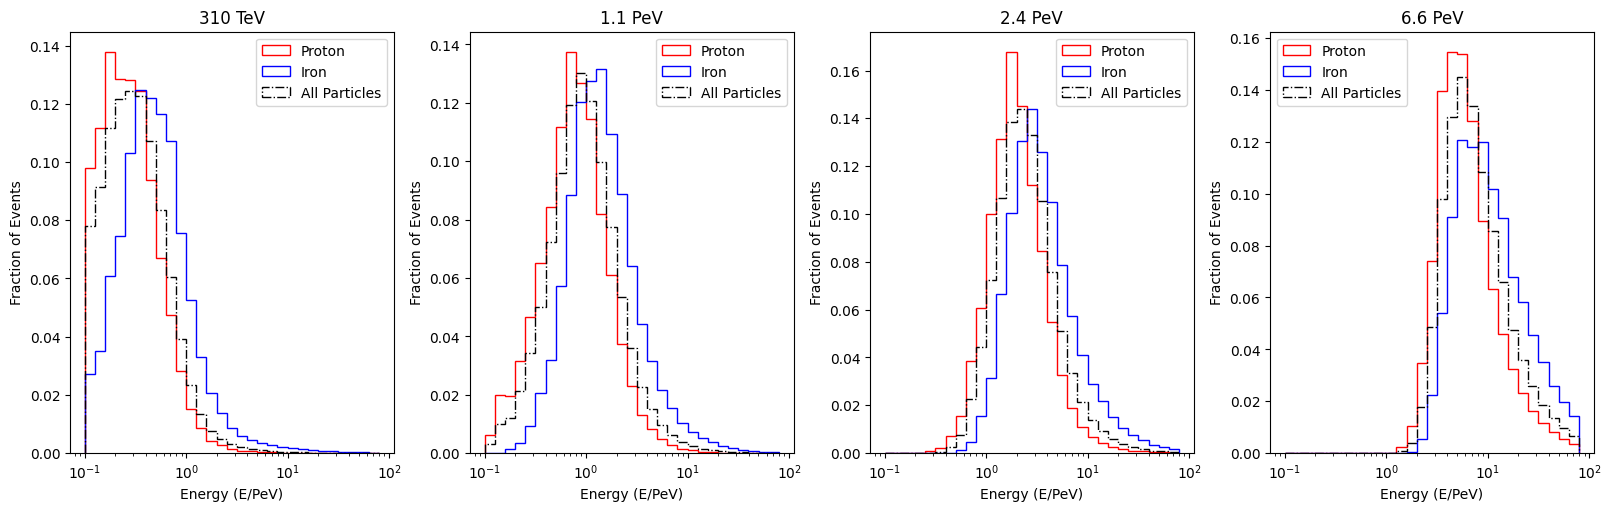

In [29]:
histograms = plt.figure(figsize=(16, 5), constrained_layout=True)
hist_array = histograms.subplots(1, 4, squeeze=False)
fig.suptitle('Proton, Iron and All Particle Energy Distributions per Energy Band')
bins = 10**(np.arange(-1,2,.1))
scale = 10**-6

hist_array[0,0].hist(mc_en_p_t1*scale, bins, weights=mc_w_p_t1/sum(mc_w_p_t1), histtype="step", linestyle="solid", color="red", label='Proton')
hist_array[0,0].hist(mc_en_fe_t1*scale, bins, weights=mc_w_fe_t1/sum(mc_w_fe_t1), histtype="step", linestyle="solid", color="blue", label="Iron")
hist_array[0,0].hist(mc_en_t1*scale, bins, weights=mc_w_t1/sum(mc_w_t1), histtype="step", linestyle="dashdot", color="black", label="All Particles")

hist_array[0,0].set_title('310 TeV')
hist_array[0,0].semilogx()
hist_array[0,0].set_ylabel('Fraction of Events')
hist_array[0,0].set_xlabel('Energy (E/PeV)')
hist_array[0,0].legend(loc='upper right')



hist_array[0,1].hist(mc_en_p_t2*scale, bins, weights=mc_w_p_t2/sum(mc_w_p_t2), histtype="step", linestyle="solid", color="red", label='Proton')
hist_array[0,1].hist(mc_en_fe_t2*scale, bins, weights=mc_w_fe_t2/sum(mc_w_fe_t2), histtype="step", linestyle="solid", color="blue", label="Iron")
hist_array[0,1].hist(mc_en_t2*scale, bins, weights=mc_w_t2/sum(mc_w_t2), histtype="step", linestyle="dashdot", color="black", label="All Particles")

hist_array[0,1].set_title('1.1 PeV')
hist_array[0,1].semilogx()
hist_array[0,1].set_ylabel('Fraction of Events')
hist_array[0,1].set_xlabel('Energy (E/PeV)')
hist_array[0,1].legend(loc='upper right')



hist_array[0,2].hist(mc_en_p_t3*scale, bins, weights=mc_w_p_t3/sum(mc_w_p_t3), histtype="step", linestyle="solid", color="red", label='Proton')
hist_array[0,2].hist(mc_en_fe_t3*scale, bins, weights=mc_w_fe_t3/sum(mc_w_fe_t3), histtype="step", linestyle="solid", color="blue", label="Iron")
hist_array[0,2].hist(mc_en_t3*scale, bins, weights=mc_w_t3/sum(mc_w_t3), histtype="step", linestyle="dashdot", color="black", label="All Particles")

hist_array[0,2].set_title('2.4 PeV')
hist_array[0,2].semilogx()
hist_array[0,2].set_ylabel('Fraction of Events')
hist_array[0,2].set_xlabel('Energy (E/PeV)')
hist_array[0,2].legend(loc='upper right')





hist_array[0,3].hist(mc_en_p_t4*scale, bins, weights=mc_w_p_t4/sum(mc_w_p_t4), histtype="step", linestyle="solid", color="red", label='Proton')
hist_array[0,3].hist(mc_en_fe_t4*scale, bins, weights=mc_w_fe_t4/sum(mc_w_fe_t4), histtype="step", linestyle="solid", color="blue", label="Iron")
hist_array[0,3].hist(mc_en_t4*scale, bins, weights=mc_w_t4/sum(mc_w_t4), histtype="step", linestyle="dashdot", color="black", label="All Particles")

hist_array[0,3].set_title('6.6 PeV')
hist_array[0,3].semilogx()
hist_array[0,3].set_ylabel('Fraction of Events')
hist_array[0,3].set_xlabel('Energy (E/PeV)')
hist_array[0,3].legend(loc='upper left')

plt.show()